In [1]:
!pip install -U selenium pandas geopandas rioxarray numpy folium
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval
!apt install chromium-chromedriver

     |████████████████████████████████| 963 kB 4.2 MB/s 
     |████████████████████████████████| 1.0 MB 52.4 MB/s 
     |████████████████████████████████| 47 kB 3.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 95 kB 3.4 MB/s 
     |████████████████████████████████| 359 kB 49.1 MB/s 
     |████████████████████████████████| 138 kB 51.8 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 3.6 MB 42.1 MB/s 
     |████████████████████████████████| 58 kB 4.5 MB/s 
     |████████████████████████████████| 6.3 MB 34.9 MB/s 
     |████████████████████████████████| 16.7 MB 350 kB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=393a7bb41e2e4e96572df3c7d4408e65a30c4dde

In [2]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '03339000'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2020-10-01', end='2021-09-30')
df

,00010_Mean,00010_Mean_cd,site_no,00060_Mean,00060_Mean_cd,00065_Mean,00065_Mean_cd,00095_Mean,00095_Mean_cd,00300_Minimum,00300_Minimum_cd,00300_Mean,00300_Mean_cd,00400_Median,00400_Median_cd,51289_Maximum,51289_Maximum_cd,51289_Minimum,51289_Minimum_cd,51289_Mean,51289_Mean_cd,63680_ysi_Maximum,63680_ysi_Maximum_cd,63680_hach_Maximum,63680_hach_Maximum_cd,63680_ysi_Minimum,63680_ysi_Minimum_cd,63680_hach_Minimum,63680_hach_Minimum_cd,63680_hach_Mean,63680_hach_Mean_cd,63680_ysi_Mean,63680_ysi_Mean_cd,91049_Mean,91049_Mean_cd,99133_Maximum,99133_Maximum_cd,99133_Minimum,99133_Minimum_cd,99133_Mean,99133_Mean_cd
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00+00:00,14.9,A,03339000,75.7,A,2.04,A,672.0,A,8.9,A,11.0,A,8.3,A,NaN,NaN,NaN,NaN,NaN,NaN,4.8,A,13.4,A,2.8,A,4.2,A,5.5,A,3.7,A,1510.0,P,4.1,A,3.3,A,3.7,A
2020-10-02 00:00:00+00:00,14.5,A,03339000,66.0,A,1.99,A,678.0,A,9.2,A,11.3,A,8.3,A,NaN,NaN,NaN,NaN,NaN,NaN,4.6,A,9.1,A,2.7,A,3.9,A,5.4,A,3.6,A,1450.0,P,4.2,A,3.8,A,4.1,A
2020-10-03 00:00:00+00:00,14.2,A,03339000,60.2,A,1.96,A,678.0,A,9.4,A,11.5,A,8.3,A,NaN,NaN,NaN,NaN,NaN,NaN,4.9,A,10.8,A,2.5,A,3.8,A,4.9,A,3.2,A,1110.0,P,3.8,A,3.0,A,3.4,A
2020-10-04 00:00:00+00:00,14.4,A,03339000,68.8,A,2.01,A,705.0,A,9.1,A,11.2,A,8.3,A,NaN,NaN,NaN,NaN,NaN,NaN,4.6,A,6.2,A,2.7,A,3.9,A,4.7,A,3.3,A,1030.0,P,3.0,A,2.6,A,2.8,A
2020-10-05 00:00:00+00:00,13.4,A,03339000,66.8,A,1.99,A,718.0,A,9.6,A,11.6,A,8.3,A,NaN,NaN,NaN,NaN,NaN,NaN,4.0,A,5.5,A,2.4,A,3.5,A,4.4,A,3.1,A,1080.0,P,3.4,A,2.7,A,3.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26 00:00:00+00:00,18.7,A,03339000,174.0,A,2.52,A,571.0,A,NaN,NaN,NaN,NaN,8.3,A,NaN,NaN,NaN,NaN,NaN,NaN,18.8,A,25.1,A,8.9,A,10.4,A,15.9,A,12.6,A,2080.0,P,2.5,A,2.1,A,2.2,A
2021-09-27 00:00:00+00:00,20.2,A,03339000,155.0,A,2.46,A,578.0,A,NaN,NaN,NaN,NaN,8.3,A,NaN,NaN,NaN,NaN,NaN,NaN,18.0,A,22.1,A,8.8,A,10.1,A,14.8,A,11.7,A,2050.0,P,2.6,A,2.2,A,2.4,A
2021-09-28 00:00:00+00:00,21.6,A,03339000,132.0,A,2.37,A,587.0,A,NaN,NaN,NaN,NaN,8.3,A,NaN,NaN,NaN,NaN,NaN,NaN,18.0,A,21.0,A,7.4,A,9.0,A,13.5,A,10.7,A,1600.0,P,2.4,A,2.1,A,2.2,A


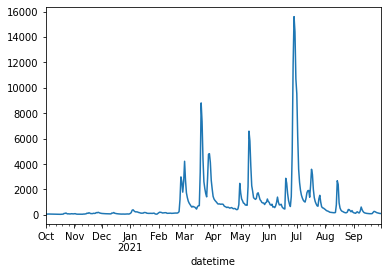

In [3]:
# Simple plot
df['00060_Mean'].plot()

---------------
## Question 1 (10 points)

Make a new `jupyter notebook` called `lab7_submission.ipynb` and complete the following tasks:


* Download daily values (i.e. `service='dv'`) for another station and time period of your choosing.



* Plot one column



* In a **markdown** cell below, describe what your plot shows

---------------

In [4]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
# MINAM RIVER AT MINAM, OR
site = '13331500'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2019-01-01', end='2021-10-01')

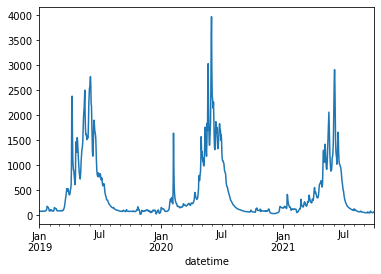

In [5]:
# Simple plot
df['00060_Mean'].plot()

For my plot I chose a station in Eastern Oreogon, at the Minam river in Wallowa County. 

The plotted graph shows very seasonal pattern. The gauge records high value spikes during the spring months leading up to July, where sudden snow melt has flooded the Minam river. The spike then tends to immediately drops later during the summer months after July, as the river dries up without snow melt to feed it.

---------------
## Question 2 (10 points)

* Make an HTML table that contains the **site name**, **site number** and **mean daily discharge** between Oct 31, 2020 and Sep 30, 2021 (zero decimal places)** for **three** rivers in the US.

HINT: the discharge parameter is `00060_Mean`. If the data from your site does not contain this column, try another site.

--------------

In [6]:
minam = '13331500'
willamette = '14166000'
mississippi = '07032000'

In [7]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '07032000'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2019-01-01', end='2021-10-01')

df['00060_Mean'].mean()

784106.4676616916

<table>
  <tr>
    <th>Site Name</th>
    <th>Site Number</th>
    <th>Mean Discharge for the Whole Year</th>
  </tr>
  <tr>
    <td>Minam</td>
    <td>13331500</td>
    <td>460.91452736318405</td>
  </tr>
  <tr>
    <td>Willamette</td>
    <td>14166000</td>
    <td>8699.512437810945</td>
  </tr>
     <tr>
    <td>Mississippi</td>
    <td>07032000</td>
    <td>784106.4676616916</td>
  </tr>
</table>

---------------
## Question 3 (10 points)

* Make a new map of the tallest mountains in Oregon but include a popup that displays the `Isolation` data as a **float**.
---------------

In [8]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [9]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

[                                                   0
 0  Map this section's coordinates using: OpenStre...
 1                       Download coordinates as: KML,
     Rank  ...                                           Location
 0      1  ...  .mw-parser-output .geo-default,.mw-parser-outp...
 1      2  ...    44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
 2      3  ...    44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
 3      4  ...    44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
 4      5  ...    44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
 5      6  ...    45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
 6      7  ...    42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
 7      8  ...    45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
 8      9  ...    45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
 9     10  ...    45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W
 10    11  ...    42°26′40″N 122°18′56″W﻿ / ﻿42.4445°N 122.3156°W
 11    12  ...    45°13′20″N 117°23′48″W﻿ / ﻿

In [10]:
# Print number of tables on webpage
len(mountains)

13

In [11]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

In [12]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)
mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [13]:
mountain_stats.dtypes

Rank               int64
Mountain peak     object
Mountain range    object
Elevation         object
Prominence        object
Isolation         object
Location          object
dtype: object

### Convert coordinates to `float`

In [14]:
# Have a look at the location object
mountain_stats['Location'].iloc[0]

'45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W'

In [15]:
# The latitude is string position 27 to 34
lat1 = mountain_stats['Location'].iloc[0][27:34]

# The longitude is string position 37 to 45
lon1 = mountain_stats['Location'].iloc[0][37:45]

In [16]:
# Convert to float and multiple by -1
float(mountain_stats['Location'].iloc[0][37:45]) * -1

-121.6959

In [17]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

[(45.3735, -121.6959),
 (44.6743, -121.7996),
 (44.1035, -121.7693),
 (44.1666, -121.7723),
 (44.1483, -121.784),
 (45.245, -117.2929),
 (42.6364, -118.5767),
 (45.203, -117.175),
 (45.3046, -117.3452),
 (45.0644, -117.246),
 (42.4445, -122.3156),
 (45.2223, -117.3968),
 (43.1528, -122.0665),
 (44.083, -121.6994),
 (44.8168, -118.1039),
 (43.9794, -121.6885),
 (44.3123, -118.7166),
 (42.9229, -122.0162),
 (43.5207, -122.1496),
 (42.0995, -118.6506),
 (42.0628, -120.2408),
 (42.3001, -120.1238),
 (43.1551, -122.22),
 (42.496, -120.8773),
 (42.3155, -122.0876),
 (42.9306, -121.3607),
 (44.7138, -118.5617),
 (42.5134, -122.1453),
 (44.2889, -118.4954),
 (42.4597, -119.7414),
 (43.6892, -121.2549)]

### Plot on a map

In [18]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
map

### Convert Elevation to `float`

In [19]:
# Get elevation value as a float
float(mountain_stats['Elevation'].iloc[0][:-2])

3428.8

In [20]:
# To get these data from every row, we can write another quick for loop
elevation = []
for i in range(len(mountain_stats)):
    elev = float(mountain_stats['Elevation'].iloc[i][:-2])
    elevation.append(elev)
elevation

[3428.8,
 3201.0,
 3158.5,
 3075.0,
 3064.0,
 3000.0,
 2968.0,
 2958.7,
 2950.0,
 2913.8,
 2895.0,
 2816.0,
 2799.4,
 2798.0,
 2777.0,
 2764.0,
 2756.1,
 2722.9,
 2666.4,
 2633.3,
 2575.8,
 2564.0,
 2553.3,
 2550.6,
 2503.83,
 2499.3,
 2482.0,
 2449.8,
 2450.0,
 2445.8,
 2435.0]

In [21]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=elevation[i]).add_to(map)
map

### Convert Isolation to `float`

In [22]:
# Get isolation value as a float
float(mountain_stats['Isolation'].iloc[0][:-2])

92.2

In [23]:
# To get these data from every row, we can write another quick for loop
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-2])
    isolation.append(iso)
isolation

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

### Map

In [24]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=isolation[i]).add_to(map)
map

 -----
## Question 4 (10 points)

* Write a script to automatically derive the geographic coordinates for the following addresses:

    * 1844 SW Morrison St, Portland, OR 97205
    
    * 800 Occidental Ave S, Seattle, WA 98134
    
    * 1001 Stadium Dr, Inglewood, CA 90301
    
    * 2700 Martin Luther King Jr Blvd, Eugene, OR 97401
-----

In [25]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

In [26]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome(options = options)

In [27]:
# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")

In [28]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

In [29]:
ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


### Geocoding

In [30]:
# Define test URL
url = 'https://www.google.com/maps/place/Hoodoo+Ski+Area+Oregon/'

# Install Chrome webdriver
driver = webdriver.Chrome(options = options)

# Open URL
driver.get(url)

In [31]:
# Click search
element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
element.click()

In [32]:
# Retrieve the URL
link = driver.current_url

# We can find the first occurrence of a character by using the "find" method
link.find('@')

50

In [33]:
split1 = link.rsplit('@', 1)
split1

['https://www.google.com/maps/place/Hoodoo+Ski+Area/',
 '44.4086436,-121.8801706,15z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [34]:
split2 = split1[1].rsplit(',', 1)
split2

['44.4086436,-121.8801706',
 '15z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [35]:
split3 = split2[0].rsplit(',', 1)
split3

['44.4086436', '-121.8801706']

In [36]:
# Here's the "one-liner"
lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)

In [37]:
lat, lon

('44.4086436', '-121.8801706')

In [38]:
driver.close()

In [40]:
import time

ski_resort_coords = []

# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(options = options)
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(2)
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()

In [41]:
ski_resort_coords

[('44.9629232', '-118.242279'),
 ('42.0816847', '-122.7135088'),
 ('45.4188448', '-121.6152074'),
 ('45.2816848', '-117.1213966'),
 ('44.4086436', '-121.8801706'),
 ('42.0816847', '-122.7135088'),
 ('44.0028934', '-121.6878262'),
 ('45.3317549', '-121.6739396'),
 ('45.2943301', '-121.807136'),
 ('45.2871415', '-121.7377963'),
 ('45.7552422', '-118.0601758'),
 ('43.7385499', '-125.2450969'),
 ('45.3311278', '-121.7197612'),
 ('42.2373737', '-120.3033932'),
 ('43.6000537', '-122.0452948')]

In [42]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(ski_resort_coords)):
    folium.Marker(ski_resort_coords[i], popup=ski_resort_names[i]).add_to(map)
map

In [43]:
address_list = ['1844 SW Morrison St, Portland, OR 97205','800 Occidental Ave S, Seattle, WA 98134','1001 Stadium Dr, Inglewood, CA 90301','2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

address_list

['1844 SW Morrison St, Portland, OR 97205',
 '800 Occidental Ave S, Seattle, WA 98134',
 '1001 Stadium Dr, Inglewood, CA 90301',
 '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [45]:
import time

address_coords = []

# Loop through every ski resort to find it's coordinates
for address in address_list:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + address
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(options = options)
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(2)
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    address_coords.append((lat, lon))
    
    # Close driver
    driver.close()

In [46]:
map = folium.Map(location=[44, -121], zoom_start=4)
for i in range(0, len(address_coords)):
    folium.Marker(address_coords[i], popup=address_list[i]).add_to(map)
map

---------------
## Question 5 below (10 points)

* Which ski resort received **more** snowfall in 2020, Mount Ashland, Willammette Pass or Hoodoo? 

--------------

In [47]:
# Import package
import xarray as xr
from google.colab import files

uploaded = files.upload()

# Define filepath
# fp = "C:/Users/littl/Dropbox (University of Oregon)/lab7"

# Read data
xds = xr.open_dataset('era_monthly_snowfall_2020.nc', decode_coords='all')

Saving era_monthly_snowfall_1979_2020.nc to era_monthly_snowfall_1979_2020.nc
Saving era_monthly_snowfall_2020.nc to era_monthly_snowfall_2020.nc


In [49]:
xds

<xarray.Dataset>
Dimensions:    (latitude: 25, longitude: 49, time: 12)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:04:05 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [50]:
ashland = xds.sel(latitude=42.0816847, longitude=-122.7135088, method='nearest')
willamette =  xds.sel(latitude=43.6000537, longitude=-122.0452948, method='nearest')
hoodoo =  xds.sel(latitude=44.4086436, longitude=-121.8801706, method='nearest')

In [53]:
ashland_sum = ashland['sf'].values.sum()
print('Ashland: ',ashland_sum)

willamette_sum = willamette['sf'].values.sum()
print('Willamette: ',willamette_sum)

hoodoo_sum = hoodoo['sf'].values.sum()
print('Hoodoo: ', hoodoo_sum)

Ashland:  0.009228621
Willamette:  0.019636936
Hoodoo:  0.025123514


The Hoodoo Ski Area has had the most snowfall for the year with .025 meters.